In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("cache/001.pickle", "rb") as f:
    res = pickle.load(f)

In [24]:
pe = []
for k, v in res.items():
    pe.extend(v["outputs"])


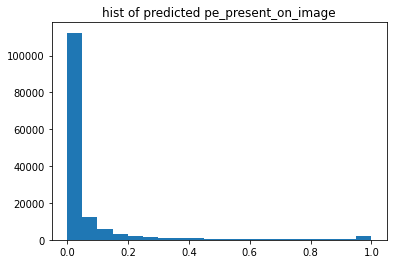

In [25]:
plt.title("hist of predicted pe_present_on_image")
plt.hist(pe, bins=20)
plt.show()

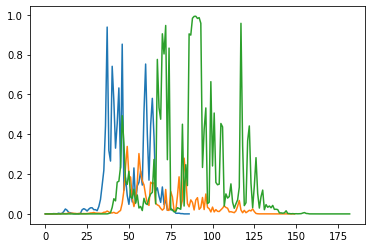

In [42]:
pe = []
for k, v in list(res.items())[3:6]:
    pe_pre = v["outputs"]
    pe.append([agg(pe_pre) for agg in aggs])
    plt.plot(pe_pre)


(650, 5)


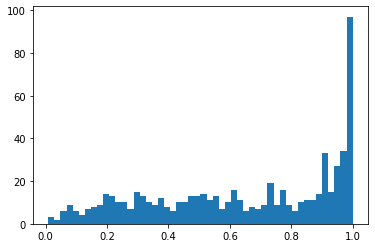

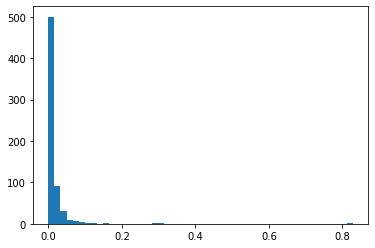

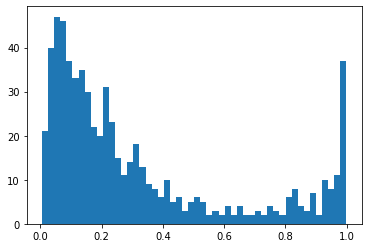

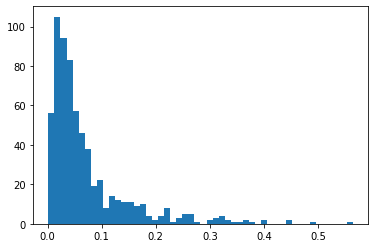

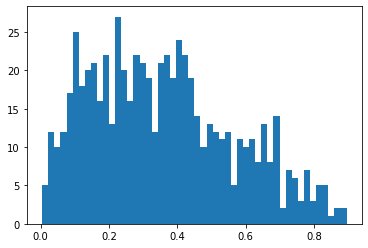

In [50]:
aggs = [
    np.max,
    np.median,
    lambda arr: np.percentile(arr, q=95),
    np.mean,
    lambda arr: np.power(np.mean(arr ** 7), 1/7)
]

pe = []
for k, v in list(res.items()):
    pe_pre = v["outputs"]
    pe.append([agg(pe_pre) for agg in aggs])
pe = np.array(pe)
print(pe.shape)

plt.hist(pe[:, 0], bins=50) ; plt.show()
plt.hist(pe[:, 1], bins=50) ; plt.show()
plt.hist(pe[:, 2], bins=50) ; plt.show()
plt.hist(pe[:, 3], bins=50) ; plt.show()
plt.hist(pe[:, 4], bins=50) ; plt.show()


In [47]:
( pe[:,2] > 0.5 ).mean()

0.22

In [51]:
# Gem P-7
( pe[:,4] > 0.5 ).mean()

0.24923076923076923

In [3]:
from src.factory import *

In [2]:
d = get_loader_train({
    "fold": 0,
    "dataset":{ "class":"RsnaDataset3D", "param": {}},
    "dataloader_train": {"param": {}}
    })

In [3]:
ds = d.dataset

In [6]:
e = ds[0]

In [9]:
i = e[0]
i.shape

(1, 128, 224, 224)

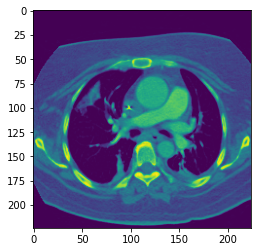

In [36]:
plt.imshow(i[0][40])

In [38]:
e[2]

'c28f3d01b14f'

In [41]:
def ave_logloss(p):  # expected binary logloss if you do mean-prediction for target of with prob p 
    return (- np.log(p)*p - np.log(1-p)*(1-p) )


In [44]:
ave_logloss(0.020484822355039723)

0.09992000541507569

In [2]:
from src.factory import *
d = get_loader_train({
    "fold": 0,
    "dataset":{ "class":"RsnaDataset", "param": {}},
    "dataloader_train": {"param": {}}
    })

In [3]:
ds = d.dataset

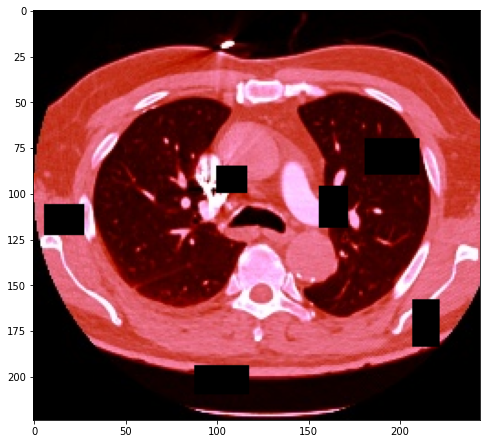

In [37]:
img = ds[5440][0].transpose(1,2,0)[:,:,::-1]
plt.figure(figsize=(8,8))
plt.imshow(img)

In [5]:
ds[10][1]

{'exam_type': 2,
 'indeterminate': 0,
 'pe_present_on_image': 0.01,
 'chronic_pe': 0,
 'acute_and_chronic_pe': 0,
 'acute_pe': 0,
 'rv_lv_ratio_gte_1': 0,
 'rightsided_pe': 0,
 'leftsided_pe': 0,
 'central_pe': 0,
 'qa_motion': 0,
 'qa_contrast': 0,
 'flow_artifact': 0,
 'true_filling_defect_not_pe': 0,
 'pe_present_portion': 0.3387096774193548}